In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization, Input
from tensorflow.keras.datasets import cifar10 # Importing the CIFAR10 Data
from keras import utils

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the CIFAR10 Data
# Dividing the data into train and test sets

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


In [5]:
print(x_test.shape)

(10000, 32, 32, 3)


In [6]:
print(y_test.shape)

(10000, 1)


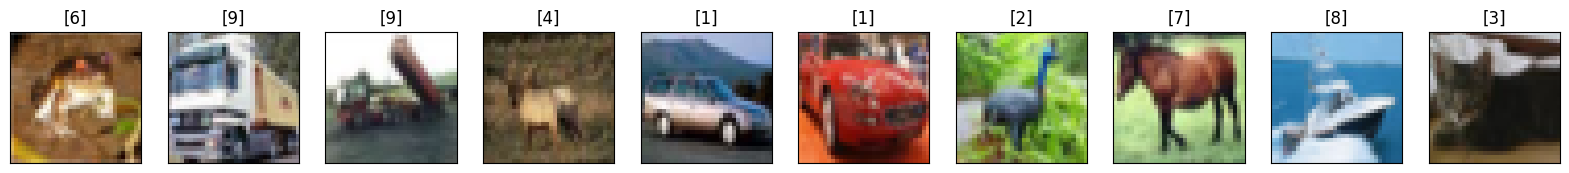

In [7]:
# Plot the first 10 images using imshow()
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
# Loop through the first 10 images
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i])
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()

In [8]:
# Create a sequential model

model = Sequential()

In [10]:
# 1st Convolutional Block
# 1st Convolutional Layer
model.add(Conv2D(filters=64, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Block
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd Convolutional Block
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# 6th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# 7th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 4th Convolutional Block
# 8th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# 9th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# 10th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 5th Convolutional Block
# 11th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# 12th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# 13th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Fully Connected Layers
# Flatten
model.add(Flatten())
# FC1
model.add(Dense(4096, activation='relu'))
# Adding DropOut to prevent Overfitting
model.add(Dropout(0.5))
#FC2
model.add(Dense(4096, activation='relu'))
# Adding DropOut to prevent Overfitting
model.add(Dropout(0.5))
# Output Layer
model.add(Dense(10, activation='softmax'))

In [11]:
# Display a summary of the model architecture, including the number of parameters in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

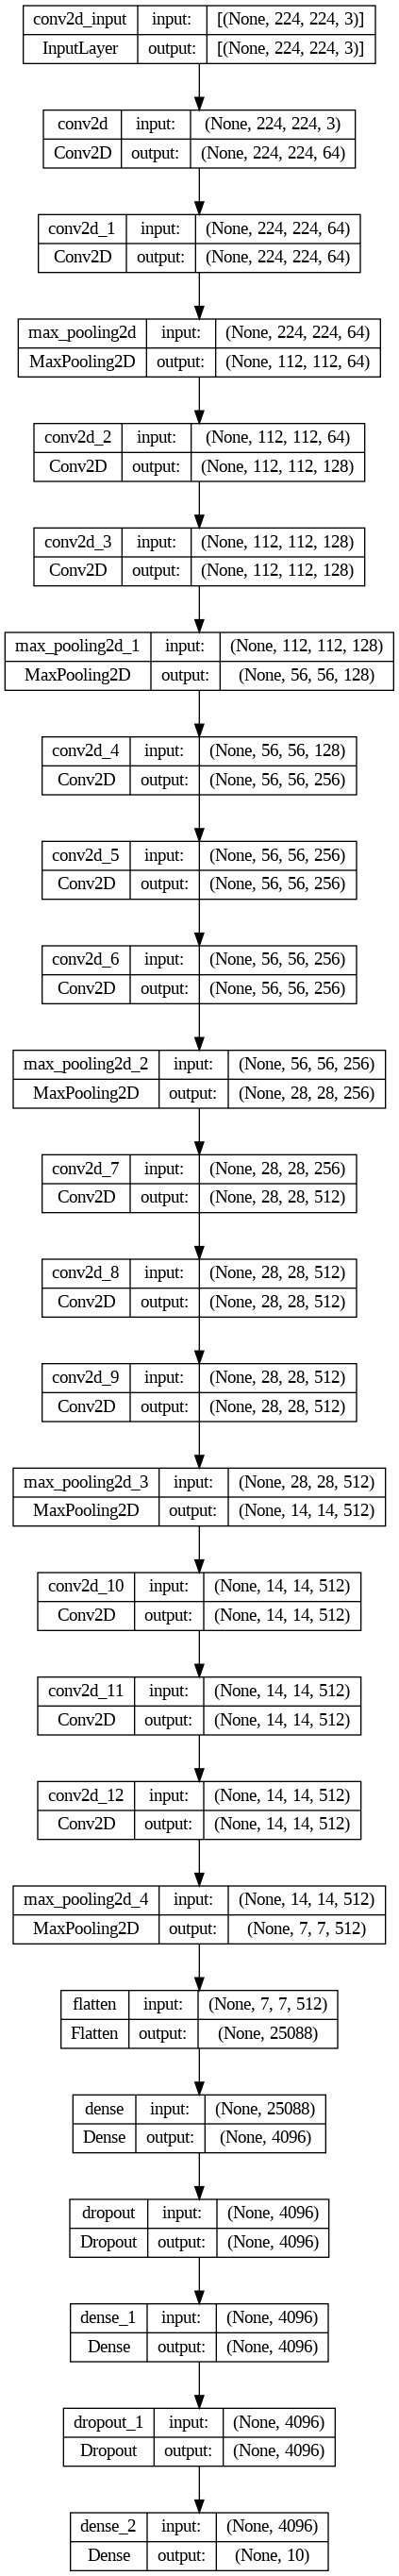

In [12]:
# Visualize the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)

In [13]:
# Compile the model
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['acc'])

In [ ]:
# Fit the model with 20 epochs (as per your desktop configuration)
model_fitting = model.fit(train_ds, epochs=10, validation_data=validation_ds)